In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points

from wcsFunction import findwcs

In [2]:
cd /orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object

/orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object


In [5]:
files = !ls *fits
files[75]

'0002613803-20200712-EMIR-STARE_IMAGE.fits'

In [6]:
testfile = fits.open(files[75])

new_wcs, starcat, table_coordinates = findwcs(testfile)

(-0.5, 2047.5, -0.5, 2047.5)

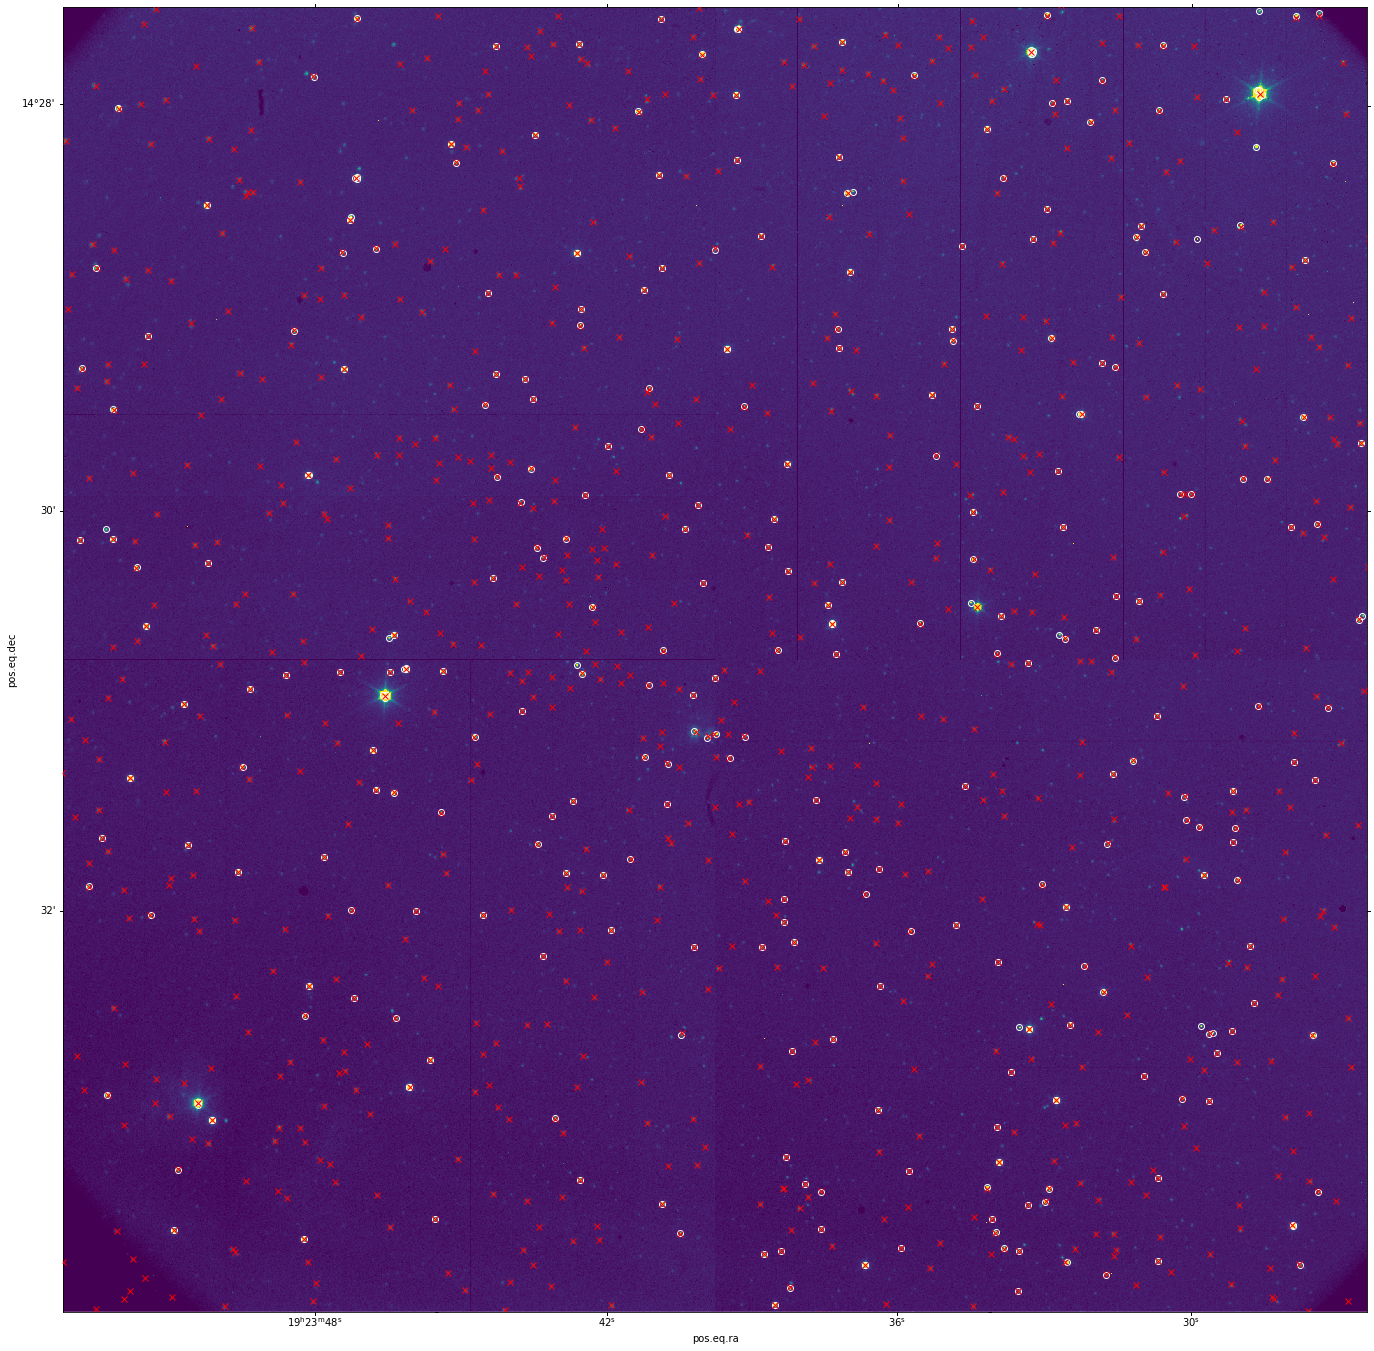

In [7]:
pl.figure(figsize=(24,24))
ax = pl.subplot(projection=new_wcs)
pl.imshow(testfile[0].data, norm=visualization.simple_norm(testfile[0].data, min_percent=1, max_percent=99.9))
axlims = ax.axis()
pl.plot(starcat['xcentroid'], starcat['ycentroid'], 'wo', markeredgecolor='w', markerfacecolor='none')
pl.plot(table_coordinates.ra,
        table_coordinates.dec,
        transform=ax.get_transform('world'), marker='x', color='r', linestyle='none')
ax.axis(axlims)